In [2]:
import pandas as pd
import numpy as np

dataframe = pd.read_csv('Real estate.csv')
dataframe.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
dataframe.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [5]:
dataframe.isna().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [6]:
df = dataframe.select_dtypes(include='number')

In [7]:
corr_matrix = dataframe.corr()

<function matplotlib.pyplot.show(close=None, block=None)>

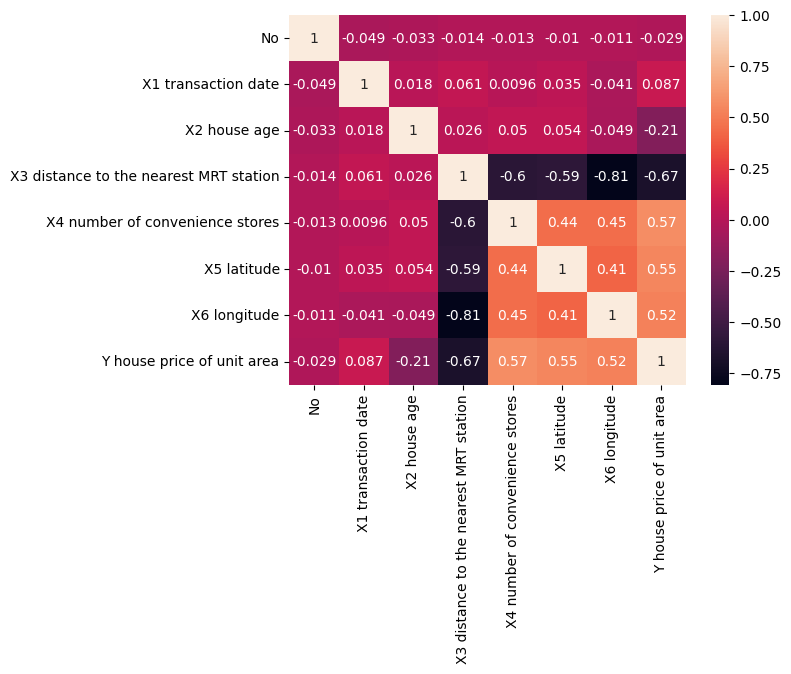

In [8]:
import seaborn as sns
from matplotlib import pyplot as plt

sns.heatmap(corr_matrix,annot=True)
plt.show

In [9]:
dataframe.shape

(414, 8)

In [10]:
df2 = dataframe.duplicated(subset='Y house price of unit area')
df2 = dataframe.drop_duplicates(subset='Y house price of unit area',keep='last')
print(df2.shape)

(270, 8)


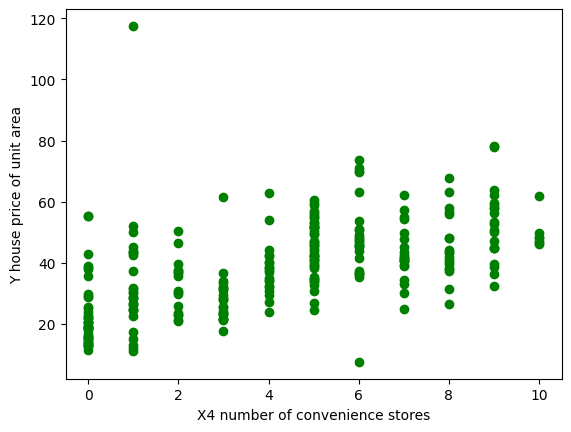

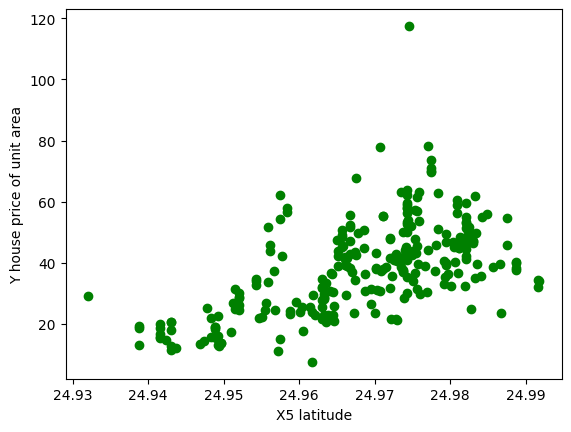

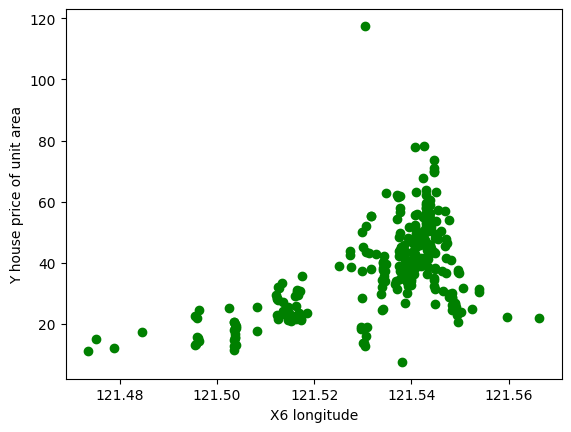

In [11]:
columns = df2.iloc[:,4:7]
y_axis= df2['Y house price of unit area']
for column in columns:
    x_axis = df2[column]
    plt.scatter(x_axis,y_axis,color='g')
    plt.xlabel(column)
    plt.ylabel('Y house price of unit area')
    plt.show()

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X = df2[['X5 latitude','X6 longitude']]
print(X.shape)
y = df2['Y house price of unit area']
print(y.shape)

Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2,random_state=0)

print('Xtrain: ',Xtrain.shape)
print('Xtest: ',Xtest.shape)
print('ytrain: ',ytrain.shape)
print('ytest: ',ytest.shape)


(270, 2)
(270,)
Xtrain:  (216, 2)
Xtest:  (54, 2)
ytrain:  (216,)
ytest:  (54,)


In [13]:
from sklearn.metrics import r2_score 
line_reg = LinearRegression()
regr = line_reg.fit(Xtrain,ytrain)
y_pred = regr.predict(Xtest)
accuracy = r2_score(ytest,y_pred)
print("Accuracy: ",accuracy*100)


Accuracy:  44.21116935097666


In [14]:
from sklearn.metrics import mean_absolute_error

mae_test = mean_absolute_error(ytest,y_pred)
mae_test


8.22796563878243

In [ ]:
df3 = df
df3.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
df4 = df3.drop(columns=['No','X1 transaction date'])
df4.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
from sklearn.preprocessing import StandardScaler
X = df4.iloc[:,:4]
y = df4.iloc[:,-1]

scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

print('Xtrain: ',X_train.shape)
print('Xtest: ',X_test.shape)
print('ytrain: ',y_train.shape)
print('ytest: ',y_test.shape)

Xtrain:  (331, 4)
Xtest:  (83, 4)
ytrain:  (331,)
ytest:  (83,)


In [ ]:
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

lin_reg1 = LinearRegression()
regr = lin_reg1.fit(X_train_scaler,y_train)
y_pred = regr.predict(X_test_scaler)
print(y_pred)

[41.37417942 12.35154702 41.10794956 12.16471041 40.34407986 40.22112805
 39.90486971 33.9191375  48.10151225 44.58314711 45.26461457 40.6548039
 40.76775387 40.2175872  48.7498167  35.91721672 40.0157913  42.34142514
 41.86262606 43.59374512 52.18970466 30.86489126 41.18403647 45.93145145
 47.43531627 44.57564787 45.08166749 28.59493213 47.70945049 23.69028159
 42.74391735 32.98769376 43.99571661 36.23253204 45.21413798 30.81190307
 47.69507041 38.9544031  54.02001751 10.12870223 51.28071346 34.1398658
 35.84568845 47.99180402 14.72089632 42.56362205 44.59498662 15.2844531
 32.68876275 46.43545616 51.97775189 41.2921419  49.08282944 24.50799384
 30.89138536 35.79029742 48.51630444 40.50199381 45.37059096 33.09367015
 42.26980269 42.29072221 39.63652879 48.26047682 39.06529981 30.04556104
 12.56641689 32.79652397 48.70176312 40.22112805 32.12214423 47.81542687
 44.09516744 32.29182479 40.19030449 34.62387469 33.70267411 15.13939702
 45.85196916 43.24268264 45.57167631 30.14955066 41.97

In [ ]:
accuracy1 = r2_score(y_test,y_pred)
print(accuracy1)

0.6420314016343813


## RandomForestRegressor 

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=500,random_state=42)
regr2 = rf_reg.fit(X_train_scaler,y_train)
y_pred = regr2.predict(X_test_scaler) 
acc = r2_score(y_test,y_pred) 
print('Accuracy RandomForest: ',acc*100)

Accuracy RandomForest:  70.99008882851207


## DecisionTreeRegressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor(max_depth=10)
reg3 = dt_reg.fit(X_train_scaler,y_train)
y_pred=reg3.predict(X_test_scaler)
acc = r2_score(y_test,y_pred)
print('Acuracy Dt: ',acc*100)


Acuracy Dt:  35.317846671713326
